# SEA LEVEL PREDICTOR 

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from epa-sea-level.csv. **OKAY**
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis. **OKAY**
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through - the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import linregress

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.

Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

Now I'm gonna extend the regression line up to the year 2050.

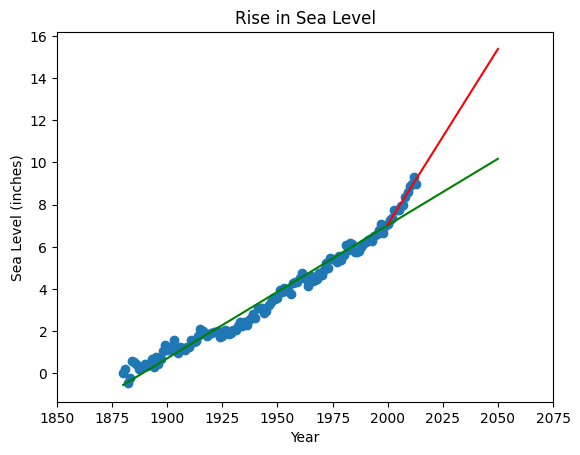

In [ ]:
# SCATTER PLOT USANDO SOLO PLOT (NO SEABORN)

def draw_plot():

    df = pd.read_csv("epa-sea-level.csv")
    
    # Complete regression
    regressionline_full = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    slope_full = regressionline_full.slope
    y_intercept_full = regressionline_full.intercept

    # Years for 2 different regression lines
    extended_years = pd.Series([i for i in range(1880,2051)])
    from_year2000 = pd.Series([i for i in range(2000,2051)])
    
    fig, ax1 = plt.subplots(1)
    ax1.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])  # Normal scatter plot
    ax1.plot(extended_years, (slope_full*extended_years)+y_intercept_full, "-g") # Regression line

    # Second regression line (starting in year 2000)
    df_2000 = df[(df["Year"]>=2000)]
    regressionline_2000 = linregress(df_2000["Year"], df_2000["CSIRO Adjusted Sea Level"])
    slope_2000 = regressionline_2000.slope
    y_intercept_2000 = regressionline_2000.intercept
    ax1.plot(from_year2000, (slope_2000*from_year2000)+y_intercept_2000, "-r") # Regression line

    # Formatting
    ax1.set_title("Rise in Sea Level")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Sea Level (inches)")
    ax1.set_xticks(
        [
            int(i)
            for i in [
                1850.0,
                1875.0,
                1900.0,
                1925.0,
                1950.0,
                1975.0,
                2000.0,
                2025.0,
                2050.0,
                2075.0,
            ]
        ]
    )
    ax1.set_xticklabels(
        [
            int(i)
            for i in [
                1850.0,
                1875.0,
                1900.0,
                1925.0,
                1950.0,
                1975.0,
                2000.0,
                2025.0,
                2050.0,
                2075.0,
            ]
        ]
    );

    plt.savefig("sea_level_plot.png")
    
  

draw_plot()

In [ ]:
df = pd.read_csv("epa-sea-level.csv")
anios = df["Year"][(df["Year"]>=2000)]
df_2000 = df[(df["Year"]>=2000)]
print(df_2000)

     Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
120  2000                  7.062992           6.791339           7.334646   
121  2001                  7.287402           7.019685           7.555118   
122  2002                  7.381890           7.110236           7.653543   
123  2003                  7.759843           7.484252           8.035433   
124  2004                  7.740157           7.464567           8.015748   
125  2005                  7.744094           7.472441           8.015748   
126  2006                  7.917323           7.645669           8.188976   
127  2007                  7.996063           7.712598           8.279528   
128  2008                  8.350394           8.078740           8.622047   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   

In [ ]:
ax1.get_children()[0].ge

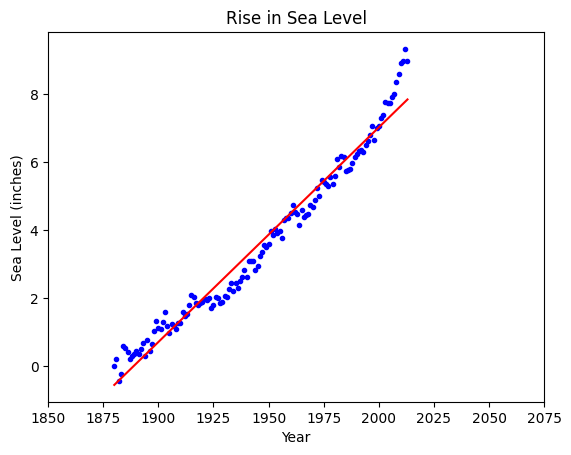

In [ ]:
fig, ax1 = plt.subplots(1)
ax1.plot(df["Year"], df["CSIRO Adjusted Sea Level"], "b.")  # Normal scatter plot
ax1.plot(df["Year"], slope*df["Year"]+y_intercept, "-r") # Regression line

# Formatting
ax1.set_title("Rise in Sea Level")
ax1.set_xlabel("Year")
ax1.set_ylabel("Sea Level (inches)")
ax1.set_xticks(
    [
        int(i)
        for i in [
            1850.0,
            1875.0,
            1900.0,
            1925.0,
            1950.0,
            1975.0,
            2000.0,
            2025.0,
            2050.0,
            2075.0,
        ]
    ]
)
ax1.set_xticklabels(
    [
        int(i)
        for i in [
            1850.0,
            1875.0,
            1900.0,
            1925.0,
            1950.0,
            1975.0,
            2000.0,
            2025.0,
            2050.0,
            2075.0,
        ]
    ]
);

ax1.get_children()[0]

In [ ]:
ax1.get_lines()[1].get_ydata().tolist()

[-0.5421240249263661,
 -0.4790794409142336,
 -0.41603485690208686,
 -0.3529902728899543,
 -0.2899456888778218,
 -0.22690110486568926,
 -0.16385652085355673,
 -0.1008119368414242,
 -0.037767352829277456,
 0.025277231182855076,
 0.08832181519498761,
 0.15136639920712014,
 0.21441098321925267,
 0.2774555672313852,
 0.34050015124351773,
 0.4035447352556645,
 0.466589319267797,
 0.5296339032799295,
 0.5926784872920621,
 0.6557230713041946,
 0.7187676553163271,
 0.7818122393284739,
 0.8448568233406064,
 0.9079014073527389,
 0.9709459913648715,
 1.033990575377004,
 1.0970351593891365,
 1.1600797434012833,
 1.2231243274134158,
 1.2861689114255483,
 1.3492134954376809,
 1.4122580794498134,
 1.475302663461946,
 1.5383472474740927,
 1.6013918314862252,
 1.6644364154983577,
 1.7274809995104903,
 1.7905255835226228,
 1.8535701675347553,
 1.9166147515468879,
 1.9796593355590346,
 2.042703919571167,
 2.1057485035832997,
 2.168793087595432,
 2.2318376716075647,
 2.2948822556196973,
 2.357926839631844,